# Введение в Matplotlib

## Мотивация к изучению

Обязательным этапом работы с различного рода данными является их визуализация. В начале работы с данными вам, вероятнее всего, захочется построить их распределения, используя гистограммы или скрипичные диаграмм. В процессе работы алгоритмов большое количество данных логируется с целью дальнейшего отображения и оценки корректности работы программы. Например, при обучении различных моделей машинного обучения обычно логируют значения функции потерь и метрики качества на каждой эпохи обучения, чтобы по итоговой визуализации оценить возможность переобучения, для оценки быстродействия какого-либо программного модуля можно сохранять данные о времени работы модуля на входных данных разного объема. Однако средствами "чистого" Python простая визуализация вне графического интерфейса какого-либо приложения недоступна. Именно тут на сцену выходит библиотека `Matplotlib`.

`Matplotlib` - это мультиплатформенная библиотека для визуализации данных, основанная на массивах библиотеки `NumPy`. Библиотека была выпущена в 2003 году и позиционировалась как инструмент построения интерактивных графиков в стиле MATLAB. Matplotlib - это кросс-платформенная библиотека, во многом именно этот факт повлиял на ее популярность. Также значительный вклад в развитие библиотеки вносили научно-исследовательские институты США, которые поддерживали проект финансово. Например, в год выхода библиотеки проект был финансово поддержан Институтом Исследования Космоса (*Space Telescope Science Institute*).

Со временем громоздкий и местами неуклюжий интерфейс Matplotlib начал устаревать, а Python сообщество постепенно начало переходить на более удобные инструменты визуализации, типа `Seaborn`. Однако в основе этих библиотек все равно лежит Matplotlib. Роль Matplotlib среди Python-фреймворков для визуализации во многом похожа на роль C++ среди языков программирования: Matplotlib отлично подходит для усвоения базовых концепций, а выучив основы Matplotlib освоить любую другую библиотеку для визуализации не составит труда. Также большинство образовательных курсов МФТИ, так или иначе связанных с обработкой данных и научными вычислениями, используют именно Matplotlib в качестве основного инструмента визуализации.

![diploma-images](./images/diploma_images.png)

## Начало работы

`Matplotlib` - достаточно обширная библиотека с большим количеством различных подмодулей, полную информацию о которых вы всегда можете найти в [официальной документации](https://matplotlib.org/stable/). На наших занятиях мы не будем работать с `Matplotlib` напрямую, а будем использовать функционал и интерфейс подмодуля `pyplot`. Для этого осуществим следующие импорты:

In [2]:
from typing import Sequence

import matplotlib.pyplot as plt
import numpy as np

Поскольку мы работаем в Jupyter Notebook, по умолчанию все наши элементы визуализации будут отображаться в виде встроенных иллюстраций. Это можно изменить с помощью специальных "магических" команд Jupyter Notebook:

- %matplotlib inline - отображение, в виде встроенных изображений - поведение по умолчанию;
- %matplotlib qt - отображение, в виде qt-виджета (для этого требуется установить [PyQT](https://pypi.org/project/PyQt5/));

## Стили

Поскольку разработчики Matplotlib во многом вдохновлялись возможностями визуализации в MATLAB, именно его стиль отображения  графиков установлен по умолчанию. В наше время этот визуальный стиль начал устаревать, к тому же некоторые проекты выдвигают иные требования к визуальному стилю графиков. Именно поэтому в Matplotlib существует возможность выбора стиля. Выбор стиля осуществляется с помощью специальной команды `plt.style.use()`, вызов которой лучше осуществлять один раз после всех необходимых импортов.

Ниже приведено несколько примеров доступных стилей. Подробнее о стилях можно прочитать [тут](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

![styles](./images/styles.png)

Также вы можете ознакомиться с перечнем стилей, доступных на вашем компьютере, с помощью переменной `plt.style.available`.

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Я предпочитаю стиль `ggplot`, поэтому далее идет код переключения именно на этот стиль, однако вы вольны выбирать любой понравившийся вам стиль.

In [4]:
plt.style.use("ggplot")

## Структура визуализации в Matplotlib

Любой объект визуализации в Matplotlib состоит из трех основных частей:

- `Figure` - фигура или холст. Фактически Figure - это контейнер, который хранит в себе некоторое количество графиков или других объектов визуализации, типа картинок. Figure позволяет осуществлять низкоуровневую работу по размещению графиков на итоговой визуализации, а также предоставляет высокоуровневый интерфейс, типа сохранения текущей визуализации в память компьютера.
- `Axes` - координатные оси. Фактически Axis - это и есть наша визуализация. Именно на Axes будут отображены различные объекты, типа линий или картинок. Axes связана с Figure и не может быть создана вне ее.
- `Artists` - это элементы визуализации: линии, точки, текст и т.д. Элементы визуализации связываются с координатными осями.

Ниже представлена схема, визуализирующая отношения различных типов объектов между собой:

![matplotlib-objects](./images/matplotlib_objects.png)

## Два интерфейса визуализации

### MATLAB-подобный интерфейс

Как говорилось выше, разработчики Matplotlib во многом вдохновлялись визуализацией в MATLAB. Этот факт отразился как на внешнем виде графиков, так и на синтаксисе самой библиотеки. Рассмотрим пример создания простого графика синусоиды с помощью MATLAB-подобного интерфейса:

In [5]:
abscissa = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
ordinates_experimental = np.sin(abscissa)

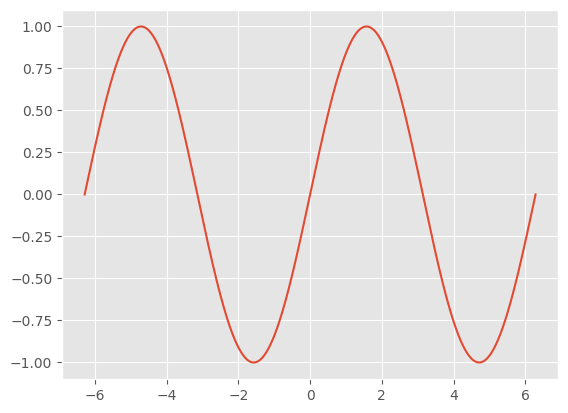

In [6]:
plt.plot(abscissa, ordinates_experimental);

Да, вот так просто в одну строчку мы визуализировали синусоиду, рассчитанную в ячейке выше. Здесь стоит обратить внимание на две вещи. Первое - структура кода. Обратите внимание, что в данном примере все вычисления вынесены в отдельную ячейку, отделенную от визуализации. Разделение вычислений и визуализации является хорошей практикой не только в Jupyter Notebook, но и в серьезных проектах. Данный подход позволяет не связывать вычисления с визуализацией, а наоборот подчеркивает их независимость и дает возможность переиспользовать функции вычислений с другими функциями визуализации, избегая повторений в коде, а функции визуализации могут быть переиспользованы с другими функциями вычислений. 

Вторая вещь, на которую стоит обратить внимание - в ячейке выше нет кода создания ни фигуры, ни координатных осей. Это связано с тем, что вызов функций визуализации через MATLAB-подобный интерфейс создает фигуру и координатные оси "под капотом", а нам, как разработчикам, нет нужды переживать по этому поводу.

Помимо подобных прямолинейных визуализаций, с помощью MATLAB-подобного интерфейса можно создавать фигуры сразу с несколькими координатными осями.

In [7]:
abscissa = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
sinus = np.sin(abscissa)
cosinus = np.cos(abscissa)

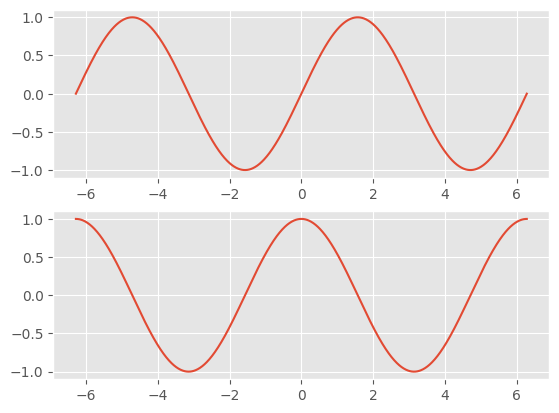

In [8]:


plt.subplot(2, 1, 1)
plt.plot(abscissa, sinus)

plt.subplot(2, 1, 2)
plt.plot(abscissa, cosinus);

Этот код выглядит не так прямолинейно. Давайте разберемся, что происходит в каждой строке этого листинга.

- `Строка 1` - мы создаем фигуру. Вообще в этом нет необходимости по причинам, озвученным ранее, однако в этом примере мы создали фигуру самостоятельно, чтобы настроить ее размеры. По умолчанию размеры фигуры равны $6.4 \times 4.8$ дюймов (да, размеры задаются ни в пикселях, а в дюймах, помним, что библиотека разработана в США). В данном примере мы задали размер фигуры в $16 \times 9$ дюймов. Подобные манипуляции с размерами осуществляются с помощью специального параметра функции `plt.figure` - `figsize`.
- `Строка 3` - с помощью специальной функции `plt.subplot` мы одновременно делаем две вещи: указываем структуру координатных осей нашей фигуры и выбираем текущую активную систему координат. Переданные числа стоит читать следующим образом: на нашей фигуре будет две строки и один столбец с координатными осями, текущая активная система координат - система координат под индексом 1. Т.е. на нашей фигуре будет два рисунка (две системы координат). Они упорядочены в виде сетки следующего размера: $2 \times 1$, т.е. записаны друг под другом в один столбец. Каждому рисунку (системе координат) присваивается свой уникальный индекс, начиная с 1. Сейчас мы работаем с рисунком под номером 1.
- `Строка 4` - отрисовать на текущей активной координатной оси линию, проходящую через заданные точки.
- `Строка 6` - работаем с той же фигурой, переключились на систему координат под номером 2.
- `Строка 7` - отрисовать на текущей активной координатной оси линию, проходящую через заданные точки.

Создание графиков через MATLAB-подобный интерфейс является достаточно простым и удобным инструментом, которому стоит отдавать предпочтения в случаях, когда необходимо осуществить визуализацию "здесь и сейчас". Однако этот подход имеет ряд недостатков. Самый главный недостаток - негибкость. При работе через MATLAB-подобный интерфейс Matplotlib вынужден сохранять ссылку на текущую актуальную систему координат. После переключения на новую систему координат (строчка 6 в рассмотренном примере) вернуться на предыдущую систему координат с целью коррекции визуализации практически невозможно и сопряжено с большим количеством трудностей. Это сильно осложняет процесс разработки и сильно связывает вам руки, как программисту.

Однако существует гораздо более гибкий способ построения графиков, которому мы и будем отдавать предпочтения в дальнейшем.

### Объектно-ориентированный интерфейс

Построим график, аналогичный предыдущему с помощью объектно-ориентированного интерфейса.

In [9]:
abscissa = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
sinus = np.sin(abscissa)
cosinus = np.cos(abscissa)

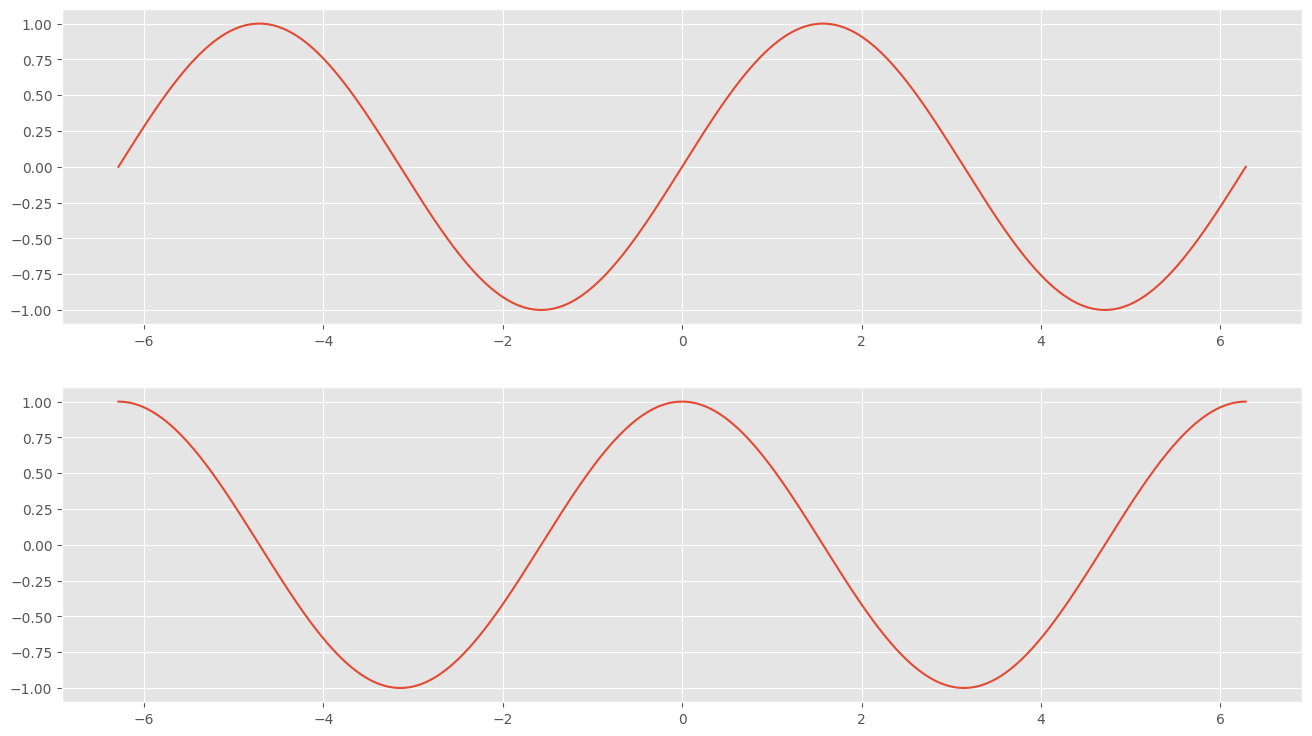

In [10]:
figure, axes = plt.subplots(2, 1, figsize=(16, 9))
axes: Sequence[plt.Axes] = axes.flatten()

axes[0].plot(abscissa, sinus)
axes[1].plot(abscissa, cosinus);

Как мы видим, результат аналогичен предыдущему. Давайте также разберемся в написанном коде:

- `Строка 1` - создаем фигуру и координатные оси с помощью функции `plt.subplots`. Первый и второй аргументы - количество систем координат по вертикали и горизонтали, соответственно. Назначение именованного аргумента `figsize` нам уже известно: он задает размер фигуры в дюймах. Данная функция вернет кортеж. Первый элемент кортежа - это наша фигура, второй элемент кортежа, или объекта типа `plt.Axes`, в случае, если значения первых двух аргументов равны 1, или `np.ndarray[plt.Axes]` - массив координатных осей, размеры которого зависят от значений первых двух аргументов. В нашем случае второй элемент кортежа - `np.ndarray`.
- `Строка 2` - "растянули" массива координатных осей для удобства. В данном примере это действие лишено смысла, потому что нам был возвращен массива, размер (2, ), однако в случае двухмерного массива, это действие может оказаться полезным.
- `Строки 4-5` - визуализируем наши графики.

В отличие от предыдущего подхода, мы вынуждены самостоятельно заботиться о создании фигуры и координатных осей. С другой стороны теперь все наши координатные оси сохранены в массиве `axes`, и мы имеем возможность редактирования любой оси в любой удобный для нас момент, чего мы были лишены до этого. Именно поэтому в нашем курсе мы будем пользоваться объектно-ориентированным интерфейсом.

## Простые линейные графики

Одни из простейших графиков, которые можно построить с помощью Matplotlib - это линейные графики, т.е. визуализации графика функции $y = f(x)$. В Matplotlib это осуществляется с помощью функции `plot`, которую мы видели во всех предыдущих примерах. Давайте же рассмотрим ее чуть подробнее.

В простейшем варианте нам достаточно передать в качестве аргумента одномерный массив ординат значений нашей функции. В этом случае массив абсцисс будет рассчитан автоматически и будет равен массиву со значениями от 0 до $n - 1$, где $n$ - размер массива ординат.

In [11]:
abscissa = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
sinus = np.sin(abscissa)

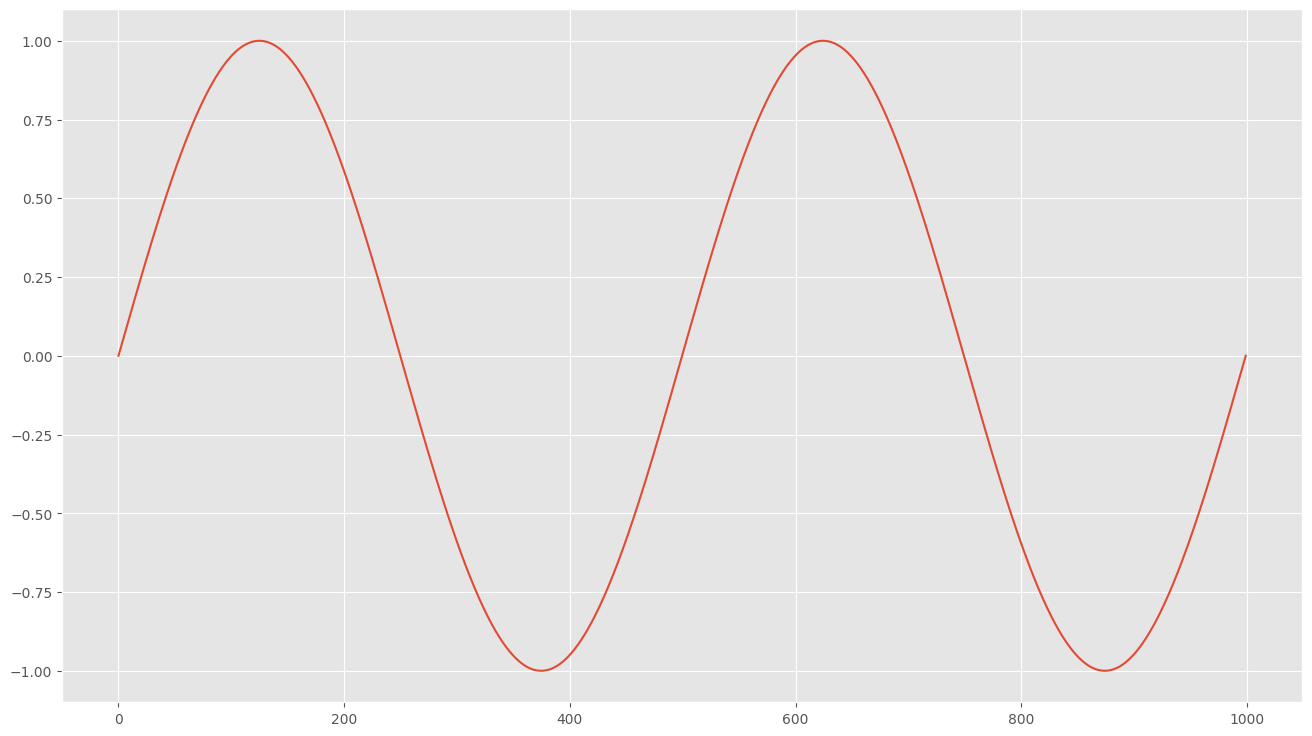

In [12]:
_, axis = plt.subplots(figsize=(16, 9))
axis.plot(sinus);

Однако, чаще всего нам известен массив абсцисс. Для построения графика с использованием массива абсцисс необходимо, чтобы размеры массивов совпадали, иначе Matplotlib возбудит соответствующее исключение.

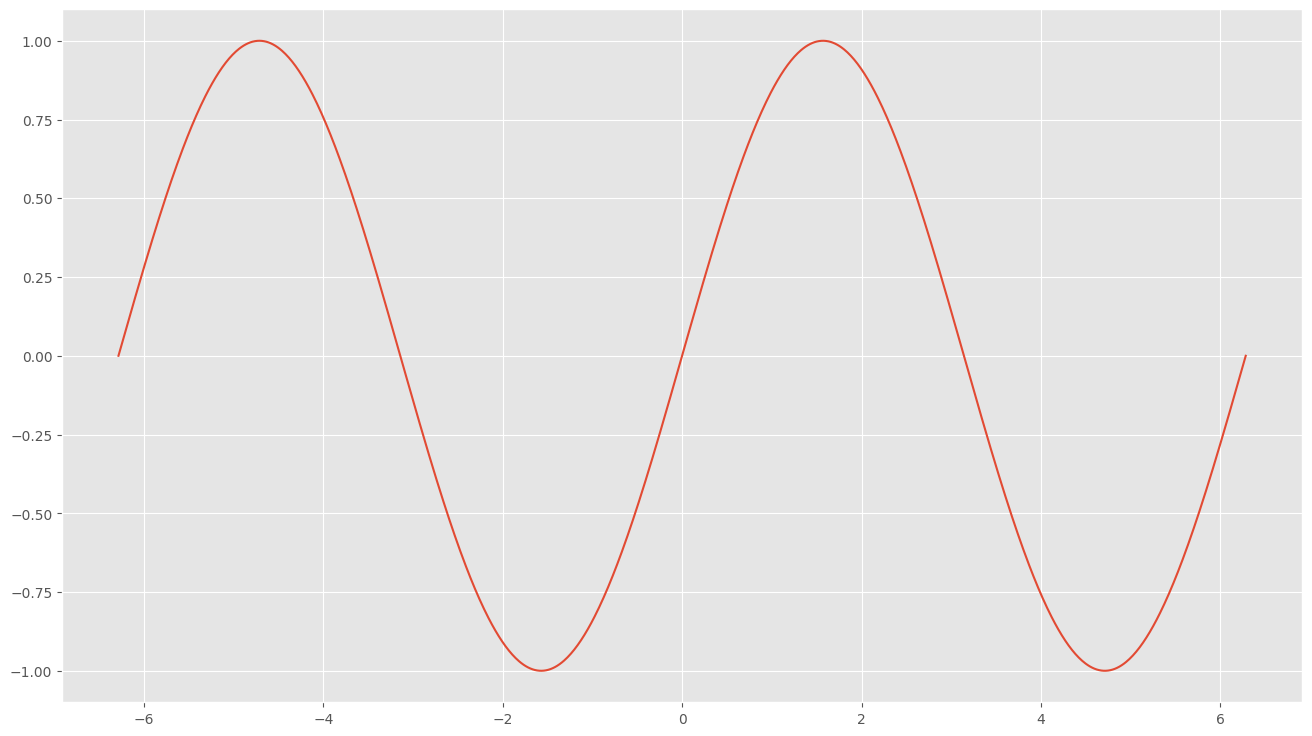

In [13]:
_, axis = plt.subplots(figsize=(16, 9))
axis.plot(abscissa, sinus);

Также вы можете визуализировать сразу несколько графиков различных функций, используя одну и ту же ось координат. Для этого достаточно просто вызвать функцию `plot` необходимое число раз с соответствующими аргументами. Будьте внимательны, каждый новый график рисуется поверх своих предшественников, поэтому существует вероятность наложения графиков друг на друга.

In [14]:
abscissa = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
ordinates_experimental = {
    "sin": np.sin(abscissa),
    "cos": np.cos(abscissa),
    "atan": np.arctan(abscissa),
}

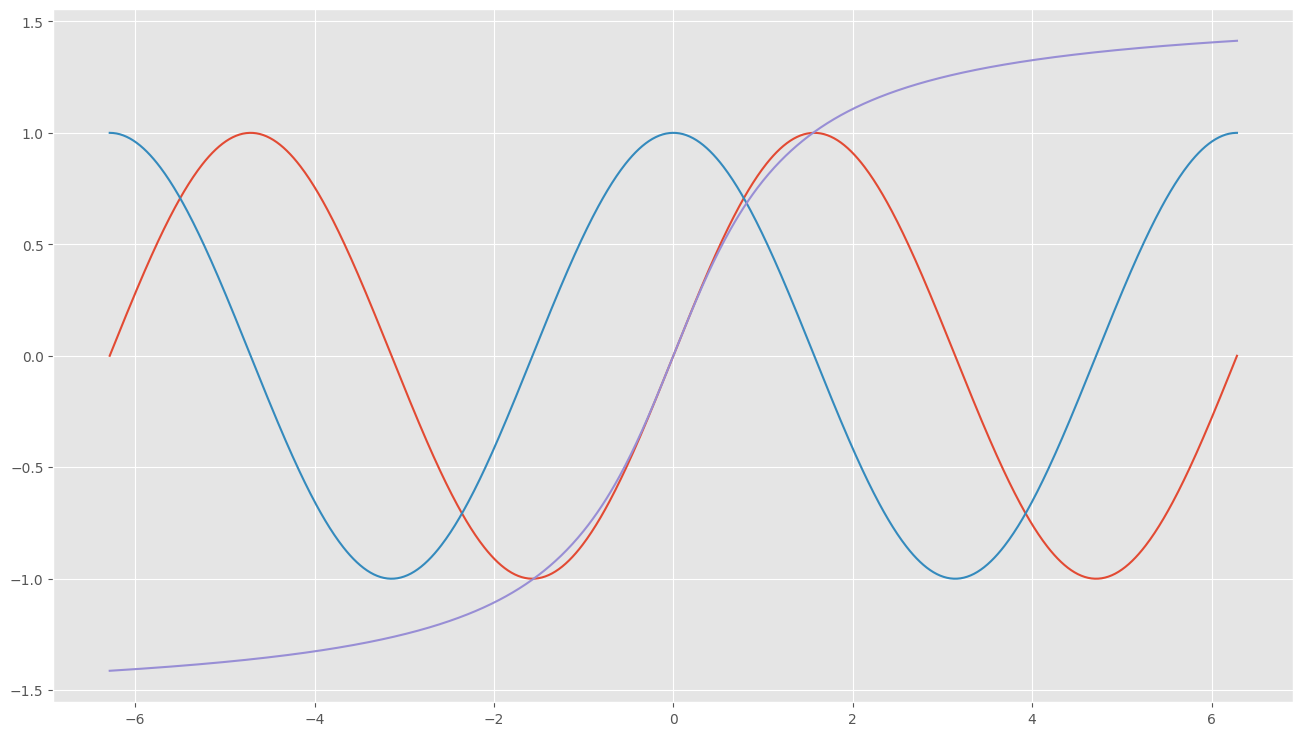

In [15]:
_, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes = axis

for ordinate in ordinates_experimental.values():
    axis.plot(abscissa, ordinate)

### Настройки цвета

Одна из первых вещей, которую вы захотите изменить на построенном графике - это цвет линии. По умолчанию, цвет очередной добавленной линии определяется автоматически, исходя из настроек выбранного стиля. Однако, вы всегда имеете возможность кастомизировать график, исходя из существующих требований. 

Для настройки цвета линейного графика используется специальный аргумент функции `plot` - `color` или его сокращенная форма `c`. Сам цвет можно задать несколькими различными способами:

- По названию. Например: `color="blue"`. Таблицу соответствия цветов и их названий можно посмотреть [здесь](https://matplotlib.org/stable/gallery/color/named_colors.html).
- По краткому коду. Например `color="b"`. Доступные сокращения: `r, g, b, c, m, y, k`. Данные сокращения отражают стандартный набор цветов, используемых в цветовых палитрах RGB - Red/Blue/Green и CMYK - Cyan/Magenta/Yellow/blacK.
- В виде шкалы оттенков. Например `color="0.75"`. Числа должны быть в диапазоне от 0 до 1, и передаваться в виде строки.
- В виде шестнадцатеричного кода. Например `color="#FFDD44"`.
- В виде кортежа RGB значений. Значения каждого элемента кортежа - число в диапазоне от 0 до 1. Пример: `color=(0.1, 0.2, 0.3)`.

In [16]:
colors = [
    "red", "g", "0.75", "#FFDA11", (0.1, 0.2, 0.3)
]

abscissa = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
ordinates_experimental = [
    np.sin(abscissa - 0.2 * i) for i in range(len(colors)) 
]

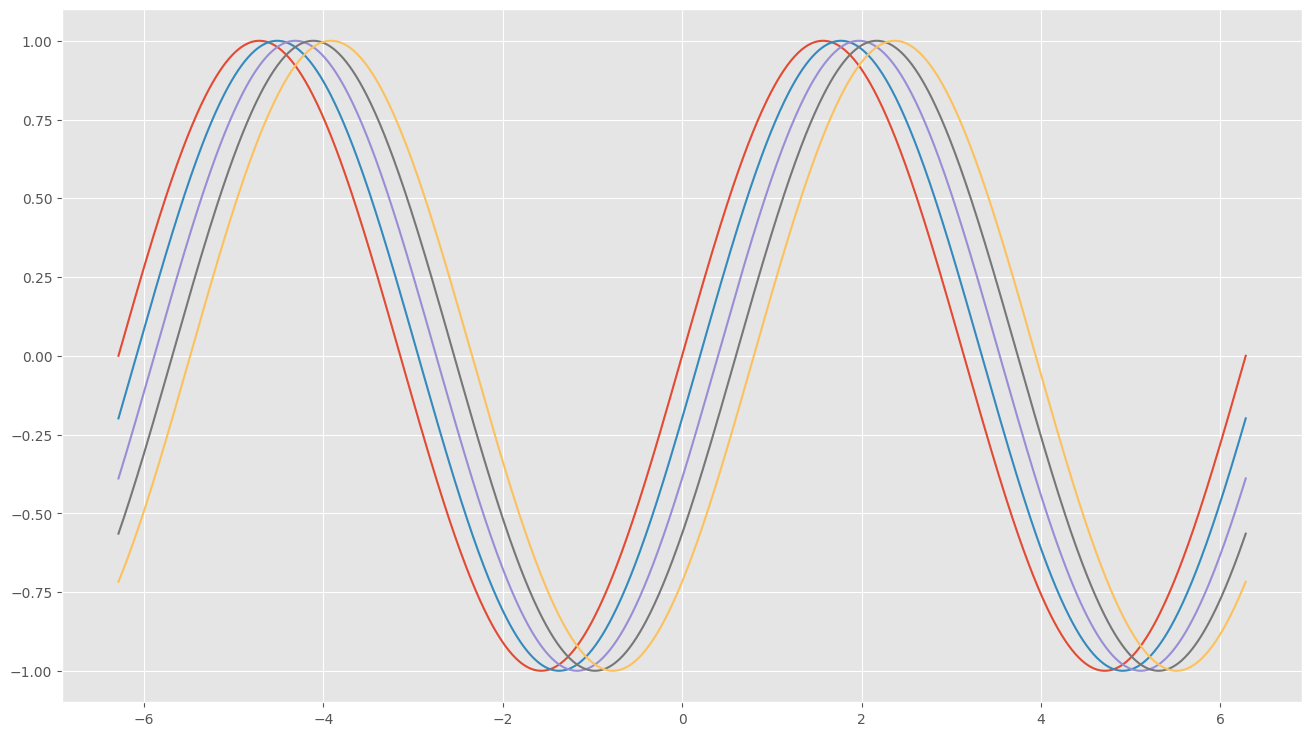

In [17]:
_, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes = axis

for ordinate in ordinates_experimental:
    axis.plot(abscissa, ordinate);

### Настройки стиля линии

Также существует ряд ситуаций, когда вам необходимо поменять стиль линии. Например, при визуализации коридора ошибок в методе наименьших квадратов вы можете захотеть использовать пунктирную, а не сплошную линию. В этом случае вы можете использовать аргумент `linestyle` функции `plot`. Аргумент `linestyle` можно задать двумя способами, используя полное название стиля или сокращение. Ниже приведены иллюстрации для основных стилей.

In [18]:
linestyles = {
    "solid": "-",
    "dashed": "--",
    "dashdot": "-.",
    "dotted": ":",
}

abscissa = [
    np.arange(5) + i for i in range(len(linestyles))
]

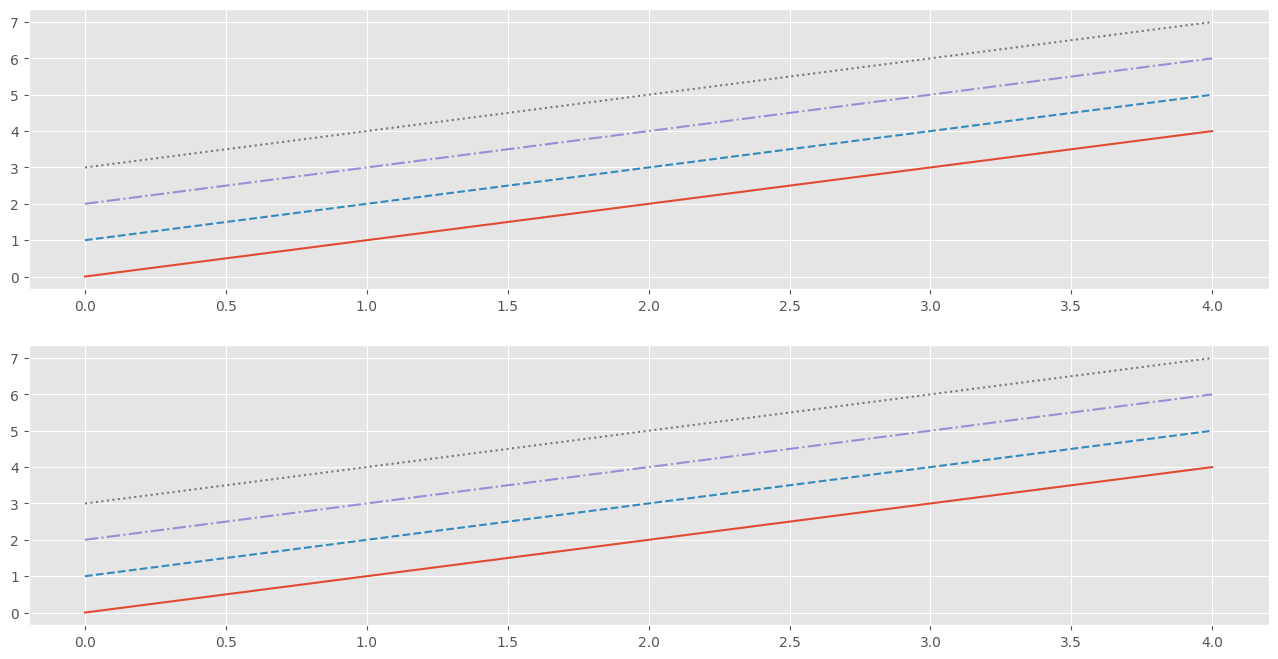

In [19]:
_, axes = plt.subplots(2, 1, figsize=(16, 8))
axes: Sequence[plt.Axes] = axes

for i, style_pair in enumerate(linestyles.items()):
    style_long, style_short = style_pair
    axes[0].plot(abscissa[i], linestyle=style_long)
    axes[1].plot(abscissa[i], linestyle=style_short)

Подробнее ознакомиться со всеми возможными стилями линий можно [здесь](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

### Настройка меток точек

При визуализации некоторой экспериментальной зависимости точки, через которые проводится линия, обычно отмечают специальными маркерами, чтобы подчеркнуть, что это не реальная зависимость, и не какая-то функция, а просто линия, проведенная через экспериментальные данные. Для того, чтобы отметить точки специальными метками, используется аргумент `marker` функции `plot`.

In [20]:
markers = ["o", "v", "^", "*"]
abscissa = [
    np.arange(5) + i for i in range(len(markers))
]

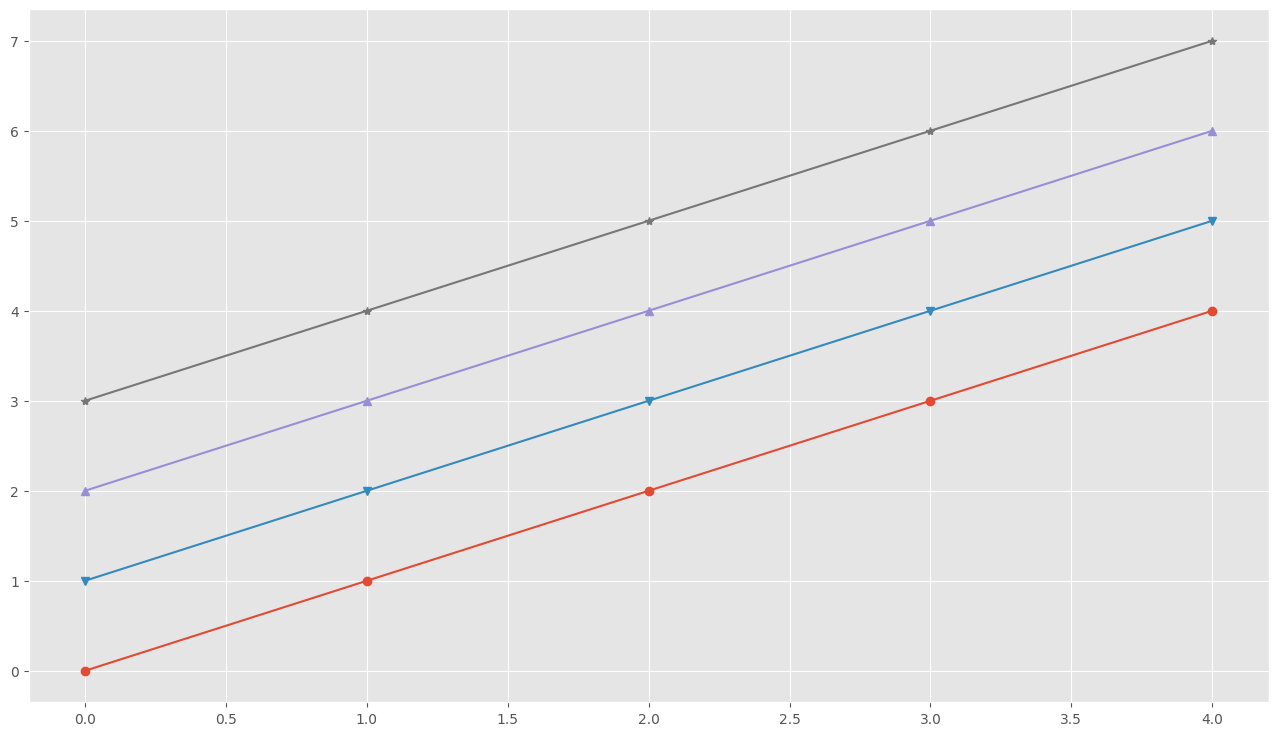

In [21]:
_, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes = axis

for i, marker in enumerate(markers):
    axis.plot(abscissa[i], marker=marker)

О доступных маркерах можно прочитать [тут](https://matplotlib.org/stable/api/markers_api.html).

### Настройка пределов координатных осей

Как мы видели выше, Matplotlib самостоятельно справляется с подбором пределов координатных осей, исходя из переданных данных. Однако часто требуется более тонкая настройка ограничений координатных осей. В объектно-ориентированном интерфейсе это делается с помощью методов объекта `plt.Axes` - `set_xlim`, `set_ylim`. В качестве аргументов необходимо передать два числа - минимальное и максимальное значение для соответствующей оси координат. Причем, если переданное максимальное значение будет меньше минимального, направление координатное оси будет изменено на противоположное.

In [22]:
abscissa = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
ordinates_experimental = np.sinc(abscissa)

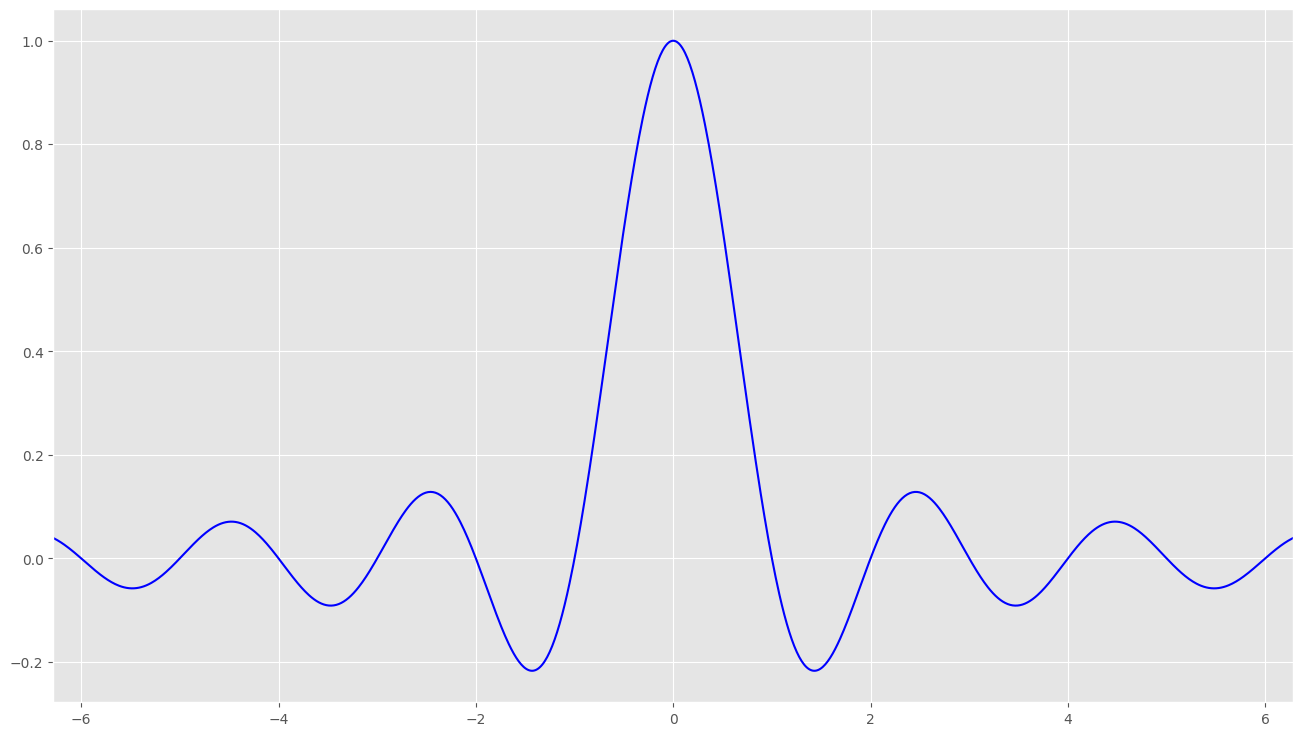

In [23]:
_, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes = axis

axis.plot(abscissa, ordinates_experimental, color="blue")
axis.set_xlim(abscissa.min(), abscissa.max());

В случае, когда необходимо выполнить настройку сразу двух координатных осей, осуществлять два последовательных вызова бывает утомительно. В этом случае можно воспользоваться методом `axis`, передав в него кортеж вида $[x_{min}, x_{max}, y_{min}, y_{max}]$.

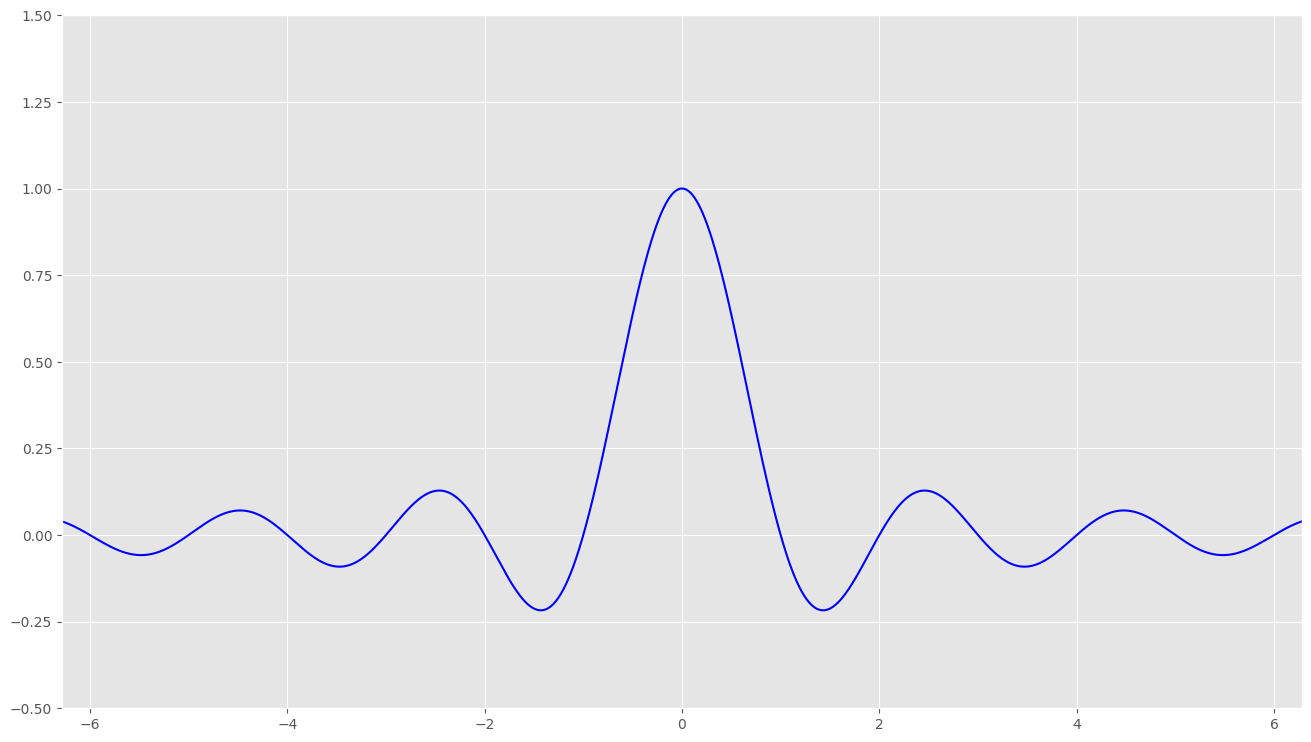

In [24]:
_, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes = axis

axis.plot(abscissa, ordinates_experimental, color="blue")
axis.axis((abscissa.min(), abscissa.max(), -0.5, 1.5));

Также в качестве аргумента в метод `axis` можно передавать текстовую спецификацию политики отображения осей. В качестве удобных вариантов, вам могут потребоваться следующие значения:

- `tight` - установка лимитов для осей, исходя из минимальных и максимальных значений переданных данных, так, чтобы все данные были отображены;
- `equal` - выравнивание соотношения сторон на графике;
- `off` - убрать полностью координатные оси; 

In [25]:
axis_strategies = ["tight", "equal", "off"]

abscissa = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
ordinates_experimental = np.sinc(abscissa)

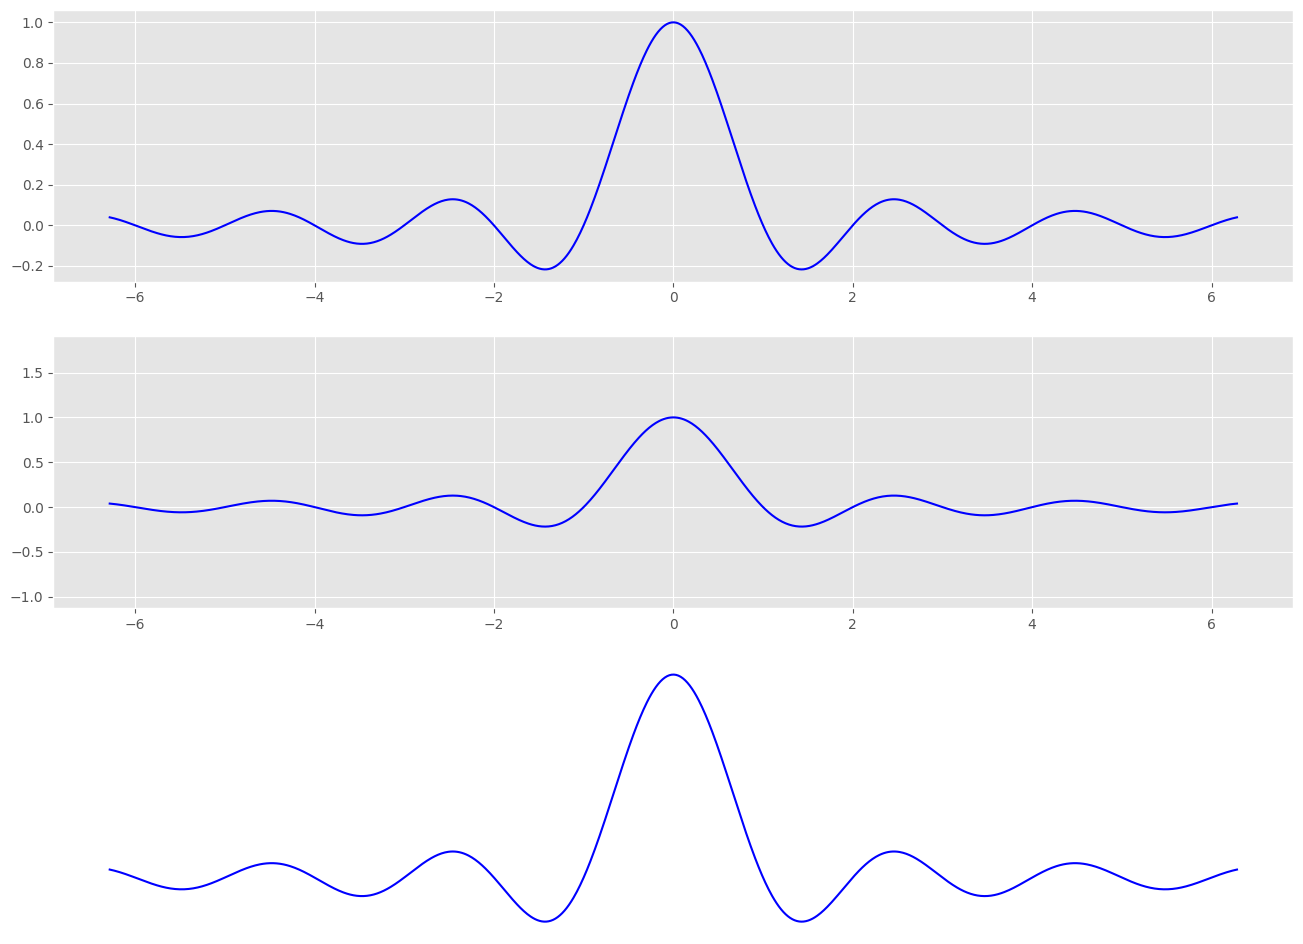

In [26]:
_, axes = plt.subplots(3, 1, figsize=(16, 12))
axes: Sequence[plt.Axes] = axes.flatten()

for ax, strategy in zip(axes, axis_strategies):
    ax.plot(abscissa, ordinates_experimental, color="blue")
    ax.axis(strategy);

### Некоторые подписи графиков

Сами по себе графики не несут никакой информации до тех пор, пока явно не указано, с каким физическим явлением связан этот график, зависимость между какими величинами на нем представлена и т.д. Обычно для указания этой информации на визуализациях используют подписи. В Matplotlib вы можете подписать графики целиком, с помощью метода `set_title`, подписать координатные оси, с помощью методов `set_xlabel`, `set_ylabel`, или связать с определенным графиком некоторую легенду. Проиллюстрируем это следующим примером:  

In [41]:
abscissa = np.linspace(0, np.pi * 6, 1000)

signal_base = np.sin(20 * abscissa)
signal_envelope =  5 * np.sin(abscissa) + 6
signal = signal_envelope * signal_base

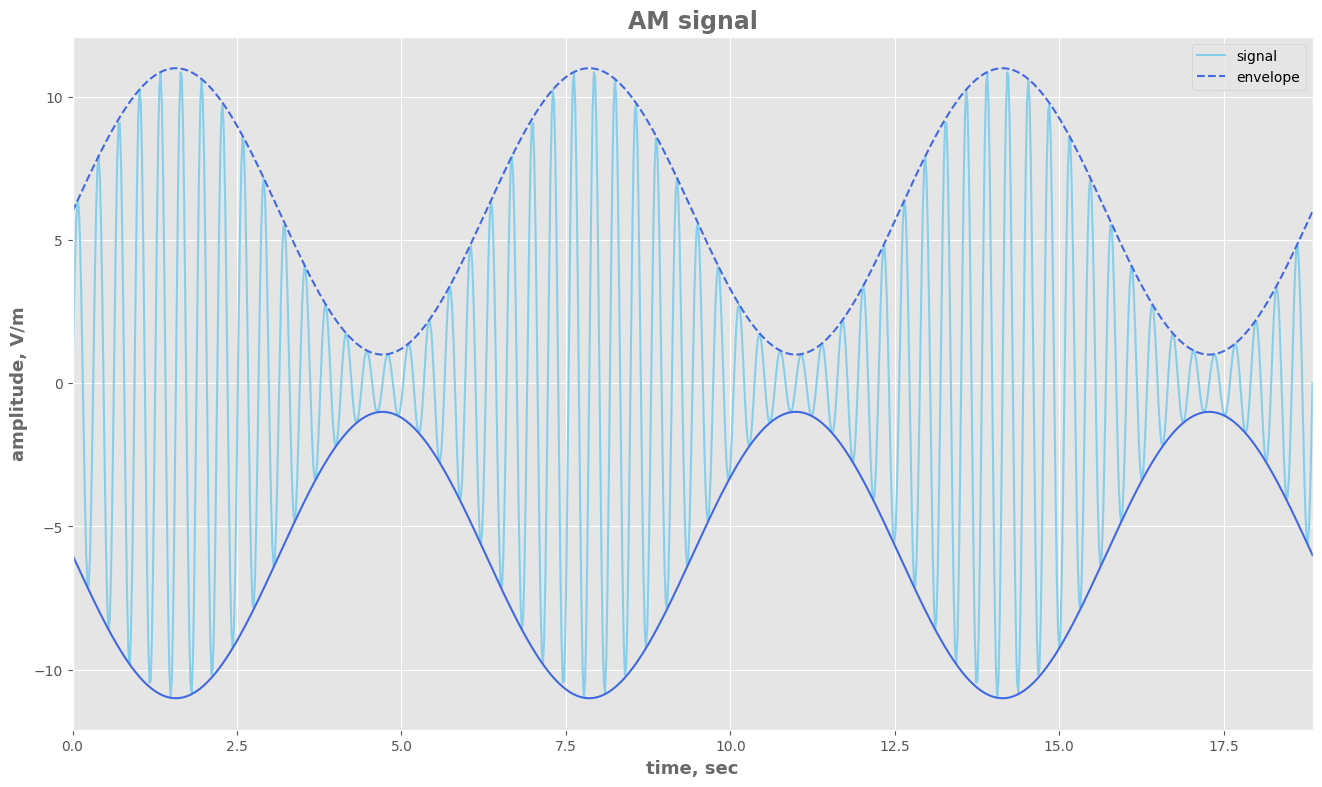

In [ ]:
figure, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes = axis

axis.set_title("AM signal", fontsize=17, fontweight="bold", c="dimgray")
axis.set_xlabel("time, sec", fontsize=13, fontweight="bold", c="dimgray")
axis.set_ylabel("amplitude, V/m", fontsize=13, fontweight="bold", c="dimgray")

axis.plot(abscissa, signal, c="skyblue", label="signal")
axis.plot(
    abscissa,
    signal_envelope,
    linestyle="--",
    c="royalblue",
    label="envelope",
)
axis.plot(
    abscissa,
    -signal_envelope,
    linestyle="--",
    c="royalblue",
)

axis.set_xlim(abscissa.min(), abscissa.max())
axis.legend();

## Сохранение визуализаций

Теперь, когда мы построили красивый информативный график, необходимо его сохранить. Конечно, его можно удобно сохранить через интерфейс Jupyter Notebook, однако такая роскошь вам будет доступна далеко не всегда, особенно это касается случаев, когда вы работаете с Python-скриптами, а не в интерактивной оболочке.

Сохранение визуализации можно осуществить с помощью специального метода `savefig` объекта `plt.Figure`. В качестве аргумента необходимо указать путь до файла. Данная команда сохранит фигуру со всем ее содержимым. Обратите внимание на аргумент `bbox_inches`, с помощью которого возможно задать паддинг результирующего изображения. Значение `tight` обозначает, что паддинг отключен, а визуализация будет сохранена в том же виде, что мы видели в ноутбуке.

In [ ]:
figure.savefig("signal.png", bbox_inches="tight") 

## Простые диаграммы рассеяния

Часто нам неизвестна форма самой функции, но известны некоторые ее экспериментальные значения. В этом случае визуализация с помощью `plot` может только сбить нас с толку, а потому не используется. Вместо нее строят так называемые диаграммы рассеяния, с помощью которых можно отрисовать облако экспериментальных точек, несоединенных между собой.

Построить диаграмму рассеяния можно с помощью метода `scatter`, сигнатура которого очень похожа на сигнатуру метода `plot`.

In [45]:
mean = [0, 0]
cov = [[2, 0], [0, 5]]

abscissa, ordinates_experimental = np.random.multivariate_normal(
    mean, cov, size=100
).T

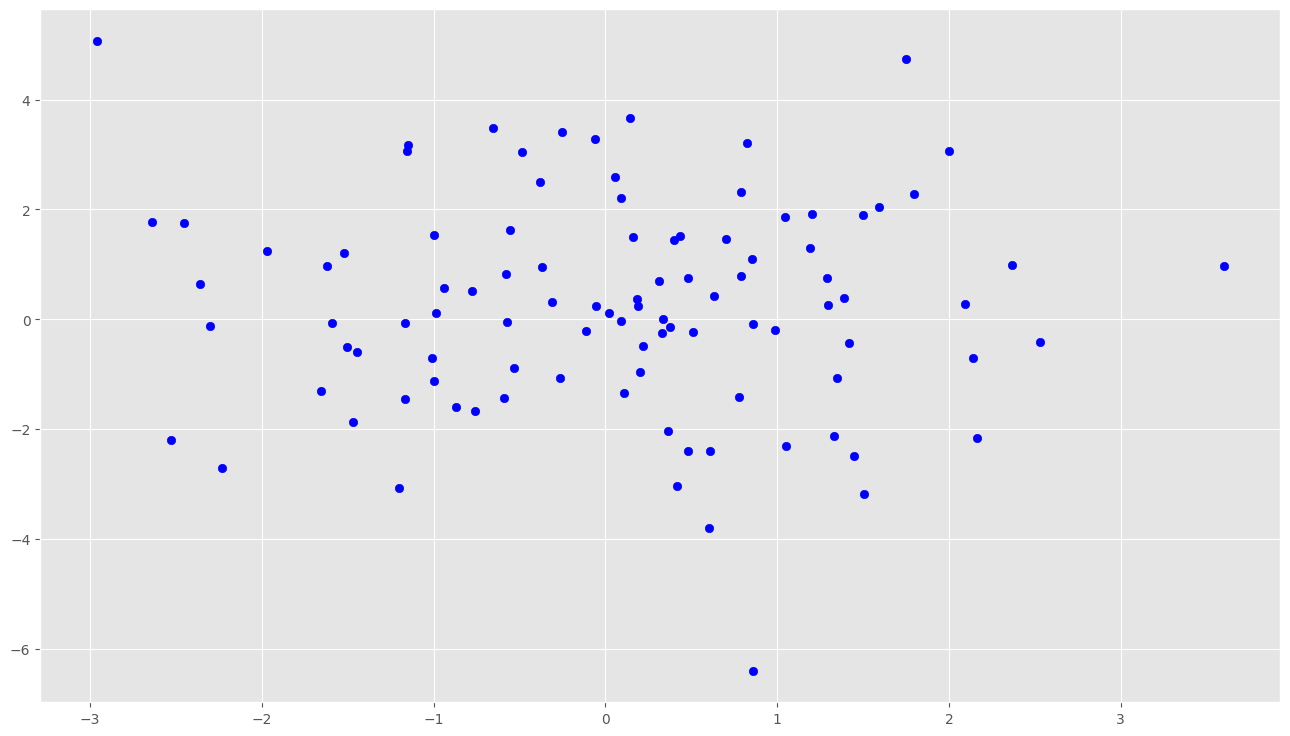

In [48]:
_, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes = axis
axis.scatter(abscissa, ordinates_experimental, c="b");

Ключевое отличие метода `scatter` от метода `plot` заключается в том, что с помощью метода `scatter` вы имеете возможность настроить внешний вид каждой точки по-отдельности, передав в качестве соответствующих аргументов список значений, размеры которого совпадают с количеством переданных точек. Рассмотрим пример. Будем изменять размеры точки в зависимости от её расстояния от начала координат: чем дальше точка, тем меньше размеры. Чтобы увидеть наложение или пересечение данных, воспользуемся параметром `alpha`, отвечающим за прозрачность.

In [49]:
mean = [0, 0]
cov = [[2, 0], [0, 5]]

abscissa, ordinates_experimental = np.random.multivariate_normal(
    mean, cov, size=500
).T

distances = np.sqrt(abscissa ** 2 + ordinates_experimental ** 2)
distance_max, distance_min = distances.max(), distances.min()

sizes = (distance_max - distances + distance_min)
sizes = 100 * (sizes - sizes.min()) / (sizes.max() - sizes.min()) + 10

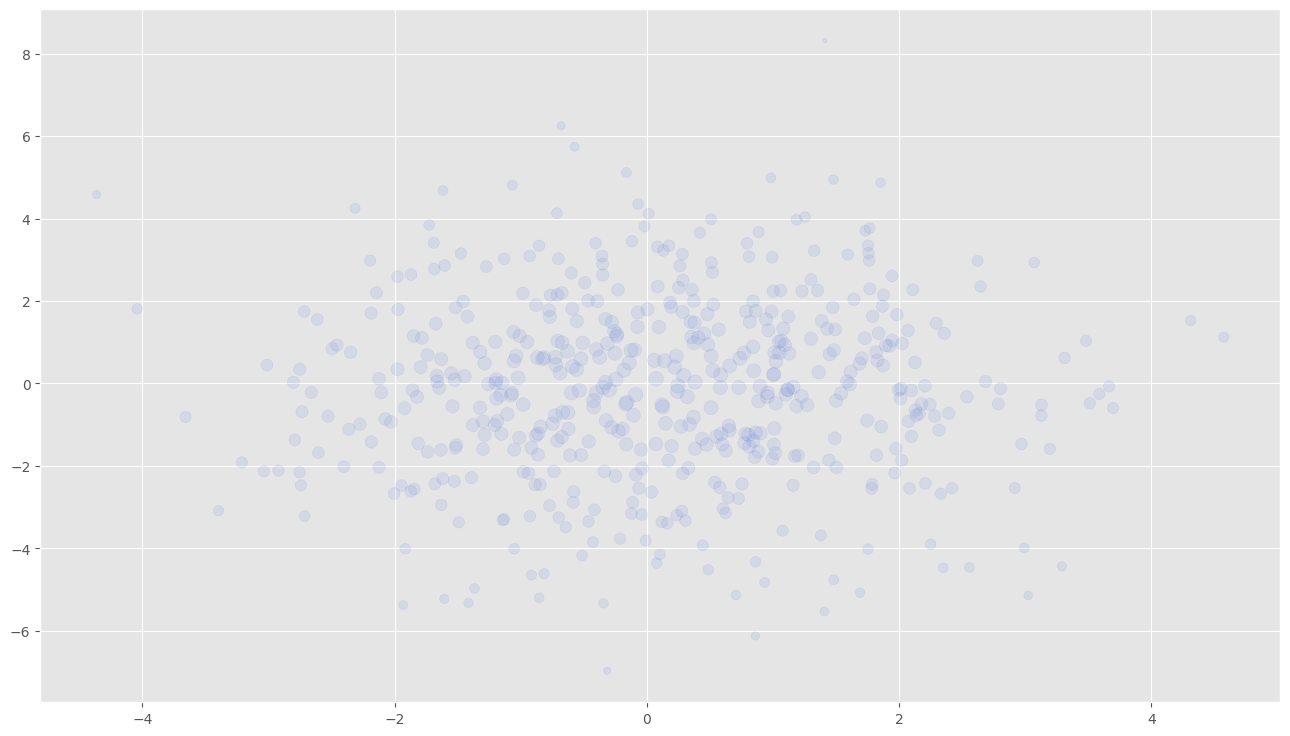

In [53]:
_, axis = plt.subplots(figsize=(16, 9))

axis.scatter(
    abscissa,
    ordinates_experimental,
    color="royalblue",
    s=sizes,
    alpha=0.1,
);

Стоит отметить, что функция `scatter` работает медленнее функции `plot`, из-за возможности настройки внешнего вида каждой отдельной точки.

## plt.show

Во всех примерах выше нам не приходилось проводить никаких дополнительных вызовов функций, чтобы посмотреть на результат. Однако, этот подход работает только в интерактивной оболочке Python и Jupyter Notebook. Если вы захотите осуществить визуализацию в вашей программе на Python, вам потребуется явно дать понять интерпретатору, когда вы хотите отобразить результат. Для этого используется вызов функции `plt.show()`. По умолчанию вызов этой функции создаст виджет отображения с вашей визуализацией и заблокирует дальнейшее выполнение программы, пока вы будете работать с созданным виджетом, а потому будьте внимательны и осторожны с вызовом функции `show()` в ваших проектах. 

## Практика 1

С помощью пройденного материала реализуйте функцию `visualize_lsm`, результат которой повторял бы приведенную ниже картинку:

![expectation](./images/expectation.png)

*Входные данные*:
- `abscissa` - `np.ndarray` чисел с плавающей точкой - значения абсцисс;
- `ordinates_experiment` - `np.ndarray` чисел с плавающей точкой - значения ординат, полученные в ходе эксперимента;
- `ordinates_theory` - `np.ndarray` чисел с плавающей точкой - значения ординат, полученные в результате использования МНК;
- `ordinates_possible_max` - `np.ndarray` чисел с плавающей точкой - максимальные значения ординат, полученные в результате использования МНК, с учетом погрешностей; 
- `ordinates_possible_min` - `np.ndarray` чисел с плавающей точкой - минимальные значения ординат, полученные в результате использования МНК, с учетом погрешностей; 

*Замечания*:
- Точки, соответствующие `ordinates_experiment`, должны быть изображены в виде диаграммы рассеяния;
- Зависимость, описываемая `ordinates_theory`, должна быть изображена в виде сплошной линии;
- Коридор допустимых отклонений, должен быть нарисован пунктирными линиями.

**Решение:**

In [137]:
def visualize_lsm(
    abscissa: np.ndarray,
    ordinates_experiment: np.ndarray,
    ordinates_theory: np.ndarray,
    ordinates_possible_max: np.ndarray,
    ordinates_possible_min: np.ndarray,
) -> None:

    plt.style.use("default")
    figure, axis = plt.subplots(figsize=(16, 9))

    axis.scatter(
        abscissa,
        ordinates_experiment,
        color='royalblue',
        alpha=0.4,
        label='input data'
    )

    axis.plot(abscissa, ordinates_theory, color='blue', label='approximation')
    axis.plot(abscissa, ordinates_possible_max,
              color='royalblue',
              linestyle='--',
              alpha=0.7,
              label='sigma-coridor'
    )
    axis.plot(abscissa, ordinates_possible_min,
              color='royalblue',
              linestyle='--',
              alpha=0.7,
    )

    axis.axis('tight')
    plt.xlim(abscissa.min(), abscissa.max())

    k = np.polyfit(abscissa, ordinates_experiment, 1)
    axis.set_title(f'f(x) = {k[0]:.2f}x + {k[1]:.2f}', fontsize=17, fontweight="bold", c="dimgray")

    plt.grid(True)
    plt.legend()
    plt.show()


**Тестирование:**

Используйте следующие данные для визуализации.

In [131]:
abscissa = np.linspace(0, 10, 100)
ordinates_experimental = 5 * abscissa + 2.5
ordinates_experimental += np.random.normal(
    size=ordinates_experimental.size,
    scale=2.5
)
ordinates_possible_max = abscissa * 5.5 + 4
ordinates_possible_min = abscissa * 4.6 + 1

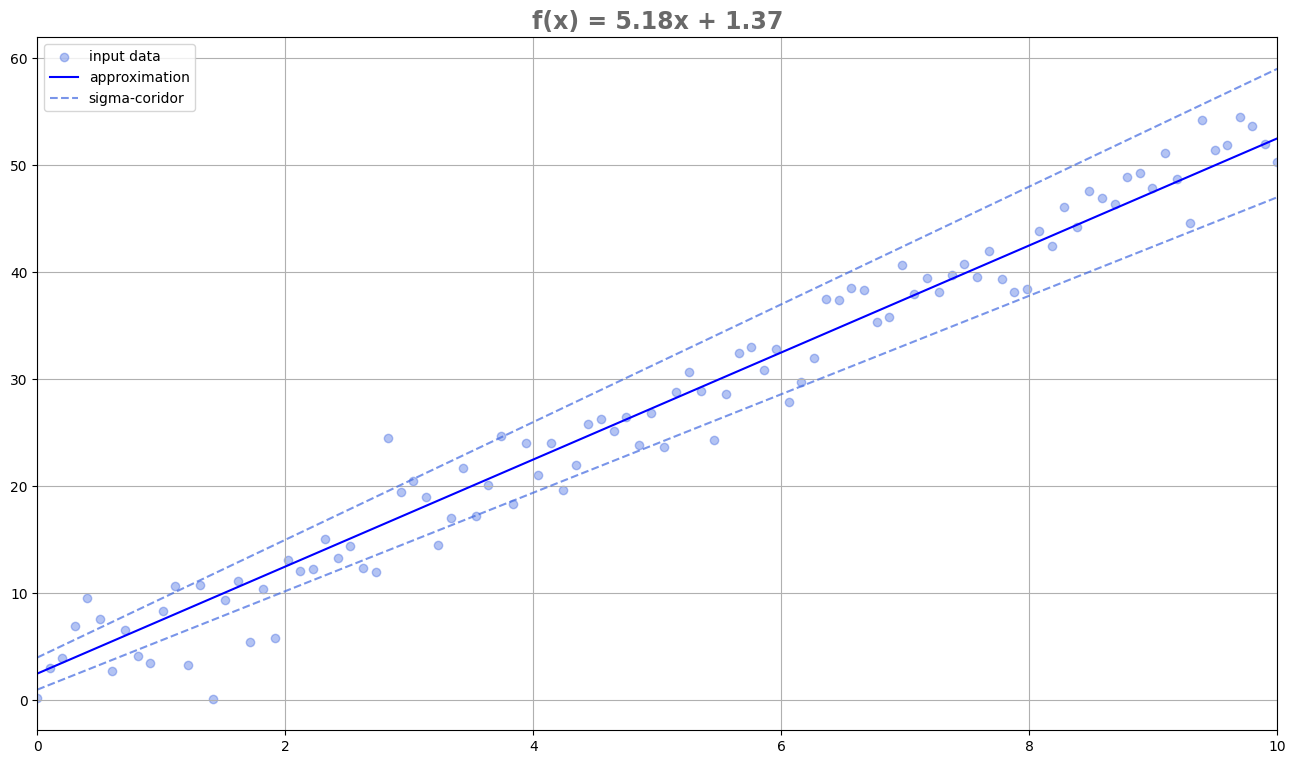

In [138]:
visualize_lsm(
    abscissa=abscissa,
    ordinates_experiment=ordinates_experimental,
    ordinates_theory=abscissa * 5 + 2.5,
    ordinates_possible_max=ordinates_possible_max,
    ordinates_possible_min=ordinates_possible_min,
)